In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('allvixm-val-data.csv', sep=';')

In [3]:
df.head(10)

,id,donor_id,donor_hla,patient_id,patient_cpra,patient_hla,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,epv_result,cdc_result
0,558716,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",71334-2660,91,"A*29:02,A*30:02,B*51:01,B*58:01,DRB1*13:01,DRB...","A*01:01,A*02:01,A*02:03,A*02:06,A*11:01,A*11:0...","DPB1*01:01,DPB1*05:01,DPB1*03:01,DPB1*06:01,DP...",1,1,0,0
1,558658,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",205670-2660,75,"A*02:01,A*02:01,B*15:16,B*40:04,DRB1*07:01,DRB...","A*01:01,A*23:01,A*24:02,A*24:03,A*80:01","DRB1*13:03,DRB1*12:02,DRB1*14:54,DRB1*14:01,DR...",-,-,1,0
2,558657,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",233572-2660,18,"A*03:01,A*23:01,B*07:02,B*07:05,DRB1*07:01,DRB...","B*35:01,B*51:01,B*53:01,B*78:01",-,1,0,1,1
3,558656,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",235844-2660,0,"A*02:01,A*30:02,B*35:01,B*45:01,DRB1*07:01,DRB...",-,-,0,0,-,0
4,558655,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",242776-2660,0,"A*03:01,A*23:01,B*35:01,B*45:01,DRB1*01:01,DRB...",-,-,0,0,-,0
5,558654,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",235944-2660,49,"A*02:01,A*74:01,B*35:01,B*50:01,DRB1*07:01,DRB...","A*23:01,A*24:02,A*24:03,A*25:01,A*29:01,B*27:0...","DRB1*03:01,DRB1*03:02,DRB1*08:01,DRB1*11:01,DR...",-,-,1,1
6,558653,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",234324-2660,0,"A*29:02,A*68:01,B*35:01,B*35:01,DRB1*07:01,DRB...",-,-,0,0,-,0
7,558652,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",237374-2660,0,"A*02:01,A*30:02,B*07:02,B*44:02,DRB1*07:01,DRB...",-,-,0,0,-,0
8,558651,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",213948-2660,6,"A*02:01,A*23:01,B*41:01,B*44:03,DRB1*07:01,DRB...",NaN,-,1,0,0,0
9,558649,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",217269-2660,0,"A*24:02,A*29:02,B*44:03,B*50:01,DRB1*07:01,DRB...",-,-,0,0,-,0


In [4]:
def classificarColuna(nome):
    data_array = [] ## array para pegar todas os dados diferentes da coluna
    dict_dif_data = {} ## dict para classificar os 196 diferentes

    for x in df[nome]:
        if x not in data_array:
            if x == 'NaN':
                continue
            else:
                data_array.append(x)
                
    print(len(data_array))
    
    count = 0
    for x in data_array:
        dict_dif_data[x] = count
        count += 1
    
    for x in range(len(df[nome])):
        if str(dict_dif_data[df[nome][x]]) == 'NaN':
            continue
        else:
            df[nome][x] = str(dict_dif_data[df[nome][x]])

In [5]:
classificarColuna('patient_single_cl1')
classificarColuna('patient_single_cl2')

180


/tmp/ipykernel_46689/2922249494.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nome][x] = str(dict_dif_data[df[nome][x]])


146


In [6]:
df_mod = df

In [7]:
def pares(iterable):
    a = iter(iterable)
    return zip(a, a)

In [8]:
for x in range(6):
    df_mod['patient_hla'+str(x)] = " "
    
for x in range(9):
    df_mod['donor_hla'+str(x)] = " "    

In [9]:
df_mod.head()

,id,donor_id,donor_hla,patient_id,patient_cpra,patient_hla,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,...,patient_hla5,donor_hla0,donor_hla1,donor_hla2,donor_hla3,donor_hla4,donor_hla5,donor_hla6,donor_hla7,donor_hla8
0,558716,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",71334-2660,91,"A*29:02,A*30:02,B*51:01,B*58:01,DRB1*13:01,DRB...",0,0,1,1,...,,,,,,,,,,
1,558658,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",205670-2660,75,"A*02:01,A*02:01,B*15:16,B*40:04,DRB1*07:01,DRB...",1,1,-,-,...,,,,,,,,,,
2,558657,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",233572-2660,18,"A*03:01,A*23:01,B*07:02,B*07:05,DRB1*07:01,DRB...",2,2,1,0,...,,,,,,,,,,
3,558656,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",235844-2660,0,"A*02:01,A*30:02,B*35:01,B*45:01,DRB1*07:01,DRB...",3,2,0,0,...,,,,,,,,,,
4,558655,308155-126,"A*03:01,A*80:01,B*35:03,B*44:03,CW*04:01,CW*04...",242776-2660,0,"A*03:01,A*23:01,B*35:01,B*45:01,DRB1*01:01,DRB...",3,2,0,0,...,,,,,,,,,,


In [10]:
import time

In [11]:
def dividir_patient_hla(j):
    transform = []
    for i in range(len(df_mod)):
        patient_hla = df_mod['patient_hla'][i].split(",")
        
        if len(patient_hla) < 12:
            for z in range(12 - len(patient_hla)):
                patient_hla.append("-")
                
        for x, y in pares(patient_hla):
            transform.append([x,y])
            
        df_mod['patient_hla'+str(j)][i] = ','.join(transform[j])
        transform = []

In [12]:
def dividir_donor_hla(j):
    transform = []
    for i in range(len(df_mod)):
        donor_hla = df_mod['donor_hla'][i].split(",")
        
        if len(donor_hla) < 18:
            for z in range(18 - len(donor_hla)):
                donor_hla.append("-")
                
        for x, y in pares(donor_hla):
            transform.append([x,y])
            
        df_mod['donor_hla'+str(j)][i] = ','.join(transform[j])
        transform = []

In [13]:
for i in range(6): # vai de 0 a 5
    dividir_patient_hla(i)

/tmp/ipykernel_46689/1264221084.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['patient_hla'+str(j)][i] = ','.join(transform[j])


In [14]:
for i in range(9): # vai de 0 a 8
    dividir_donor_hla(i)

/tmp/ipykernel_46689/4112756189.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['donor_hla'+str(j)][i] = ','.join(transform[j])


In [15]:
df_mod.drop('id', inplace=True, axis=1)
df_mod.drop('donor_id', inplace=True, axis=1)
df_mod.drop('patient_id', inplace=True, axis=1)
df_mod.drop('patient_cpra', inplace=True, axis=1)
df_mod.drop('patient_hla', inplace=True, axis=1)

In [16]:
df['patient_hla0'] = df['patient_hla0'].str.replace(',','/')
df['patient_hla1'] = df['patient_hla1'].str.replace(',','/')
df['patient_hla2'] = df['patient_hla2'].str.replace(',','/')
df['patient_hla3'] = df['patient_hla3'].str.replace(',','/')
df['patient_hla4'] = df['patient_hla4'].str.replace(',','/')
df['patient_hla5'] = df['patient_hla5'].str.replace(',','/')

for i in range(9):
    df['donor_hla'+str(i)] = df['donor_hla'+str(i)].str.replace(',','/')

In [17]:
df_mod.drop('donor_hla', inplace=True, axis=1)

In [18]:
df_mod.head()

,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,epv_result,cdc_result,patient_hla0,patient_hla1,patient_hla2,patient_hla3,...,patient_hla5,donor_hla0,donor_hla1,donor_hla2,donor_hla3,donor_hla4,donor_hla5,donor_hla6,donor_hla7,donor_hla8
0,0,0,1,1,0,0,A*29:02/A*30:02,B*51:01/B*58:01,DRB1*13:01/DRB1*15:01,DRB3*01:01/DRB5*01:01,...,DQB1*06:03/DQB1*06:02,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01
1,1,1,-,-,1,0,A*02:01/A*02:01,B*15:16/B*40:04,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,...,DQB1*02:02/DQB1*06:02,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01
2,2,2,1,0,1,1,A*03:01/A*23:01,B*07:02/B*07:05,DRB1*07:01/DRB1*15:03,DRB4*01:01/DRB5*01:01,...,DQB1*02:02/DQB1*06:02,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01
3,3,2,0,0,-,0,A*02:01/A*30:02,B*35:01/B*45:01,DRB1*07:01/DRB1*13:01,DRB3*01:01/DRB4*01:01,...,DQB1*02:02/DQB1*06:03,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01
4,3,2,0,0,-,0,A*03:01/A*23:01,B*35:01/B*45:01,DRB1*01:01/DRB1*15:01,DRB5*01:01/DQA1*01:01,...,DQB1*06:02/-,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01


In [19]:
df_mod = df_mod[['donor_hla0', 'donor_hla1', 'donor_hla2', 'donor_hla3', 'donor_hla4', 'donor_hla5', 'donor_hla6','donor_hla7','donor_hla8','patient_single_cl1', 'patient_single_cl2', 'patient_mixed_cl1', 'patient_mixed_cl2',
                'epv_result', 'patient_hla0', 'patient_hla1', 'patient_hla2', 'patient_hla3', 'patient_hla4', 'patient_hla5',
                'cdc_result']]

In [20]:
def classificarColunaDfMod(nome):
    data_array = []
    dict_dif_data = {}

    for x in df_mod[nome]:
        if x not in data_array:
            if x == 'NaN':
                continue
            else:
                data_array.append(x)
    
    count = 0
    for x in data_array:
        dict_dif_data[x] = count
        count += 1
    
    for x in range(len(df[nome])):
        if str(dict_dif_data[df_mod[nome][x]]) == 'nan':
            continue
        else:
            df_mod[nome][x] = str(dict_dif_data[df_mod[nome][x]])

In [21]:
df_mod = df_mod[df_mod['patient_mixed_cl1'].str.contains("-") == False]
df_mod = df_mod[df_mod['patient_mixed_cl2'].str.contains("-") == False]
df_mod = df_mod[df_mod['patient_single_cl1'].str.contains("-") == False]
df_mod = df_mod[df_mod['patient_single_cl2'].str.contains("-") == False]
df_mod = df_mod[df_mod['epv_result'].str.contains("-") == False]

In [22]:
df_mod['patient_single_cl1'] = df_mod['patient_single_cl1'].astype('int64')
df_mod['patient_single_cl2'] = df_mod['patient_single_cl2'].astype('int64')
df_mod['patient_mixed_cl1'] = df_mod['patient_mixed_cl1'].astype('int64')
df_mod['patient_mixed_cl2'] = df_mod['patient_mixed_cl2'].astype('int64')
df_mod['epv_result'] = df_mod['epv_result'].astype('int64')
df_mod['cdc_result'] = df_mod['cdc_result'].astype('int64')

## -------- TA FALTANDO O CÓDIGO DE TOKENIZAR O PATIENT_SINGLE_CL1

In [23]:
def unique(list1):
    list_set = set(df_mod[list1])
    unique_list = (list(list_set))
    
    return unique_list

In [24]:
donor_hla0 = unique('donor_hla0')
donor_hla1 = unique('donor_hla1')
donor_hla2 = unique('donor_hla2')
donor_hla3 = unique('donor_hla3')
donor_hla4 = unique('donor_hla4')
donor_hla5 = unique('donor_hla5')
donor_hla6 = unique('donor_hla6')
donor_hla7 = unique('donor_hla7')
donor_hla8 = unique('donor_hla8')
patient_single_cl1 = unique('patient_single_cl1')
patient_single_cl2 = unique('patient_single_cl2')
patient_mixed_cl1 = unique('patient_mixed_cl1')
patient_mixed_cl2 = unique('patient_mixed_cl2')
epv_result = unique('epv_result')
cdc_result = unique('cdc_result')

In [25]:
patient_hla0 = unique('patient_hla0')
patient_hla1 = unique('patient_hla1')
patient_hla2 = unique('patient_hla2')
patient_hla3 = unique('patient_hla3')
patient_hla4 = unique('patient_hla4')
patient_hla5 = unique('patient_hla5')

In [26]:
df_mod.head(10)

,donor_hla0,donor_hla1,donor_hla2,donor_hla3,donor_hla4,donor_hla5,donor_hla6,donor_hla7,donor_hla8,patient_single_cl1,...,patient_mixed_cl1,patient_mixed_cl2,epv_result,patient_hla0,patient_hla1,patient_hla2,patient_hla3,patient_hla4,patient_hla5,cdc_result
0,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01,0,...,1,1,0,A*29:02/A*30:02,B*51:01/B*58:01,DRB1*13:01/DRB1*15:01,DRB3*01:01/DRB5*01:01,DQA1*01:03/DQA1*01:02,DQB1*06:03/DQB1*06:02,0
2,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01,2,...,1,0,1,A*03:01/A*23:01,B*07:02/B*07:05,DRB1*07:01/DRB1*15:03,DRB4*01:01/DRB5*01:01,DQA1*02:01/DQA1*01:02,DQB1*02:02/DQB1*06:02,1
8,A*03:01/A*80:01,B*35:03/B*44:03,CW*04:01/CW*04:01,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*01:02/DQA1*02:01,DQB1*02:02/DQB1*06:02,DPA1*01:03/DPA1*01:03,DPB1*02:01/DPB1*13:01,5,...,1,0,0,A*02:01/A*23:01,B*41:01/B*44:03,DRB1*07:01/DRB1*15:01,DRB4*01:01/DRB5*01:01,DQA1*02:01/DQA1*01:02,DQB1*02:02/DQB1*06:02,0
13,A*31:01/A*31:01,B*15:01/B*35:01,CW*03:03/CW*04:01,DRB1*04:01/DRB1*14:33,DRB4*01:01/DRB4*01:01,DQA1*03:01/DQA1*03:01,DQB1*02:02/DQB1*03:02,DPA1*01:03/DPA1*02:02,DPB1*02:01/DPB1*05:01,6,...,1,1,1,A*30:02/A*68:01,B*18:01/B*35:01,DRB1*08:01/DRB1*14:01,DRB3*02:02/DQA1*04:01,DQA1*01:04/DQB1*04:02,DQB1*05:03/-,0
16,A*31:01/A*31:01,B*15:01/B*35:01,CW*03:03/CW*04:01,DRB1*04:01/DRB1*14:33,DRB4*01:01/DRB4*01:01,DQA1*03:01/DQA1*03:01,DQB1*02:02/DQB1*03:02,DPA1*01:03/DPA1*02:02,DPB1*02:01/DPB1*05:01,8,...,1,1,0,A*24:02/A*30:09,B*15:16/B*35:08,DRB1*14:01/DRB1*14:01,DRB3*02:02/DRB3*02:02,DQA1*01:04/DQA1*01:04,DQB1*05:03/DQB1*05:03,0
17,A*31:01/A*31:01,B*15:01/B*35:01,CW*03:03/CW*04:01,DRB1*04:01/DRB1*14:33,DRB4*01:01/DRB4*01:01,DQA1*03:01/DQA1*03:01,DQB1*02:02/DQB1*03:02,DPA1*01:03/DPA1*02:02,DPB1*02:01/DPB1*05:01,9,...,1,1,0,A*02:01/A*24:02,B*35:05/B*39:09,DRB1*04:11/DRB1*14:06,DRB3*01:01/DRB4*01:01,DQA1*05:01/DQB1*03:02,DQB1*03:01/-,0
18,A*24:02/A*33:01,B*14:02/B*57:01,DRB1*07:01/DRB1*16:03,DRB4*01:01/DQA1*02:01,DQB1*02:02/-,-/-,-/-,-/-,-/-,5,...,1,1,0,A*01:01/A*01:01,B*15:01/B*51:01,DRB1*13:01/DRB1*16:01,DRB3*01:01/DRB5*02:02,DQA1*01:03/DQA1*01:02,DQB1*06:03/DQB1*05:02,0
19,A*24:02/A*33:01,B*14:02/B*57:01,DRB1*07:01/DRB1*16:03,DRB4*01:01/DQA1*02:01,DQB1*02:02/-,-/-,-/-,-/-,-/-,10,...,1,0,0,A*03:01/A*26:01,B*07:02/B*08:01,DRB1*13:01/DRB1*16:02,DRB3*01:01/DRB5*02:02,DQA1*01:03/DQA1*05:01,DQB1*06:03/DQB1*03:01,0
21,A*24:02/A*33:01,B*14:02/B*57:01,DRB1*07:01/DRB1*16:03,DRB4*01:01/DQA1*02:01,DQB1*02:02/-,-/-,-/-,-/-,-/-,11,...,1,1,1,A*30:01/A*68:02,B*07:02/B*15:47,CW*02:02/CW*07:02,DRB1*15:03/DRB1*15:03,DRB5*01:01/DRB5*01:01,DQA1*01:01/DQA1*01:02,0
26,A*24:02/A*33:01,B*14:02/B*57:01,DRB1*07:01/DRB1*16:03,DRB4*01:01/DQA1*02:01,DQB1*02:02/-,-/-,-/-,-/-,-/-,12,...,1,1,1,A*23:01/A*68:02,B*14:02/B*44:03,DRB1*07:01/DRB1*11:02,DRB3*02:02/DRB4*01:01,DQA1*02:01/DQA1*05:01,DQB1*02:02/DQB1*03:01,0


In [27]:
count0 = (df_mod['cdc_result'] == 0).sum()
count1 = (df_mod['cdc_result'] == 1).sum()

In [28]:
df_mod = pd.get_dummies(df_mod)

In [29]:
df_mod.head(5)

,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,epv_result,cdc_result,donor_hla0_A*01:01/A*01:01,donor_hla0_A*01:01/A*02:01,donor_hla0_A*01:01/A*03:01,donor_hla0_A*01:01/A*11:01,...,patient_hla5_DQB1*06:03/DQB1*05:02,patient_hla5_DQB1*06:03/DQB1*06:01,patient_hla5_DQB1*06:03/DQB1*06:02,patient_hla5_DQB1*06:03/DQB1*06:03,patient_hla5_DQB1*06:03/DQB1*06:04,patient_hla5_DQB1*06:04/-,patient_hla5_DQB1*06:04/DQB1*06:02,patient_hla5_DQB1*06:04/DQB1*06:04,patient_hla5_DRB4*01:01/DQA1*01:01,patient_hla5_DRB5*01:01/DQA1*01:02
0,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,6,4,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,8,6,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample,shuffle

In [31]:
count_class_0, count_class_1 = df_mod.cdc_result.value_counts()

df_class_0 = df_mod[df_mod['cdc_result'] == 0]
df_class_1 = df_mod[df_mod['cdc_result'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

df_1_upsampled = resample(df_class_1, random_state=42, n_samples=len(df_class_0), replace=True)
df_upsampled = pd.concat([df_1_upsampled, df_class_0])
df_upsampled.cdc_result.value_counts()

1    287
0    287
Name: cdc_result, dtype: int64

In [32]:
df_upsampled

,patient_single_cl1,patient_single_cl2,patient_mixed_cl1,patient_mixed_cl2,epv_result,cdc_result,donor_hla0_A*01:01/A*01:01,donor_hla0_A*01:01/A*02:01,donor_hla0_A*01:01/A*03:01,donor_hla0_A*01:01/A*11:01,...,patient_hla5_DQB1*06:03/DQB1*05:02,patient_hla5_DQB1*06:03/DQB1*06:01,patient_hla5_DQB1*06:03/DQB1*06:02,patient_hla5_DQB1*06:03/DQB1*06:03,patient_hla5_DQB1*06:03/DQB1*06:04,patient_hla5_DQB1*06:04/-,patient_hla5_DQB1*06:04/DQB1*06:02,patient_hla5_DQB1*06:04/DQB1*06:04,patient_hla5_DRB4*01:01/DQA1*01:01,patient_hla5_DRB5*01:01/DQA1*01:02
609,136,93,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,59,2,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
759,156,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,73,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,77,6,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,5,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
923,5,144,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,3,6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937,5,145,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
labels = df_upsampled['cdc_result'].to_numpy()
df_upsampled = df_upsampled.drop('cdc_result', axis = 1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(df_upsampled, labels, test_size = 0.40, random_state = 42)

In [34]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (344, 1587)
Training Labels Shape: (344,)
Testing Features Shape: (230, 1587)
Testing Labels Shape: (230,)


In [35]:
from sklearn.model_selection import cross_validate

In [36]:
def cross_validation(model, _X, _y, _cv=10):
        _scoring = ['accuracy', 'precision', 'recall', 'f1']
        results = cross_validate(estimator=model, X= _X, y= _y, cv= _cv, scoring= _scoring, return_train_score=True)
      
        return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [37]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    
        plt.figure(figsize=(12,6))
        labels = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Fold 6", "Fold 7", "Fold 8", "Fold 9", "Fold 10"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='#2DB350', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='#FF595E', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

# Árvore de Decisão

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate


In [39]:
# classifcador
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=1000, max_depth=3, min_samples_leaf=5)
decision_tree_result = cross_validation(clf_entropy, df_upsampled, labels)
print(decision_tree_result)

{'Training Accuracy scores': array([0.93992248, 0.93217054, 0.9379845 , 0.93217054, 0.92843327,
       0.9245648 , 0.93423598, 0.93230174, 0.9303675 , 0.92843327]), 'Mean Training Accuracy': 93.20584619075464, 'Training Precision scores': array([0.90681004, 0.89679715, 0.89788732, 0.89964158, 0.89891697,
       0.88967972, 0.89160839, 0.88888889, 0.89679715, 0.89928058]), 'Mean Training Precision': 0.8966307781745076, 'Training Recall scores': array([0.98062016, 0.97674419, 0.98837209, 0.97286822, 0.96511628,
       0.96899225, 0.98837209, 0.98841699, 0.97297297, 0.96525097]), 'Mean Training Recall': 0.9767726197958755, 'Training F1 scores': array([0.94227188, 0.93506494, 0.94095941, 0.93482309, 0.93084112,
       0.92764378, 0.9375    , 0.93601463, 0.93333333, 0.9310987 ]), 'Mean Training F1 Score': 0.9349550878031717, 'Validation Accuracy scores': array([0.87931034, 0.9137931 , 0.86206897, 0.89655172, 0.94736842,
       0.89473684, 0.9122807 , 0.92982456, 0.9122807 , 0.94736842]), 'M

In [40]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=1000)

In [41]:
y_pred = clf_entropy.predict(X_test)
print('predicted values:')
print(y_pred)

predicted values:
[0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 0]


In [42]:
print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ",
accuracy_score(y_test,y_pred)*100)
      
print("Report : ",
classification_report(y_test, y_pred))

Confusion Matrix:  [[ 90  17]
 [  1 122]]
Accuracy :  92.17391304347827
Report :                precision    recall  f1-score   support

           0       0.99      0.84      0.91       107
           1       0.88      0.99      0.93       123

    accuracy                           0.92       230
   macro avg       0.93      0.92      0.92       230
weighted avg       0.93      0.92      0.92       230



In [43]:
import matplotlib.pyplot as plt

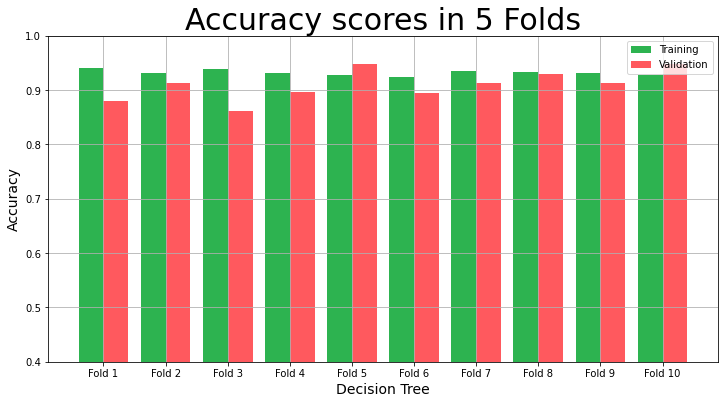

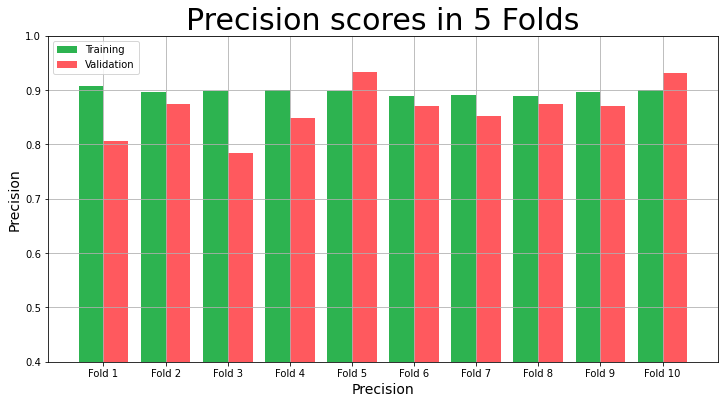

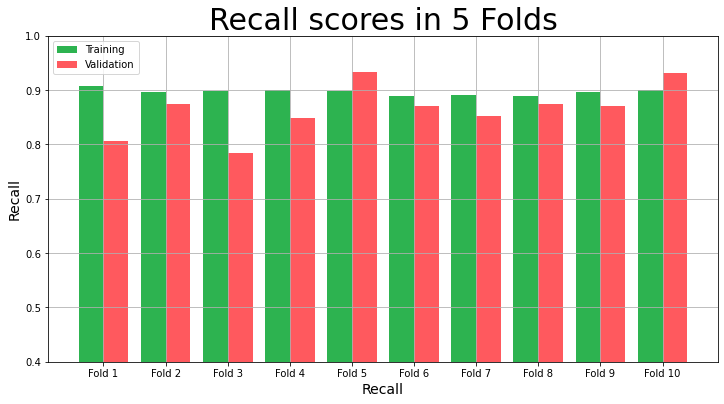

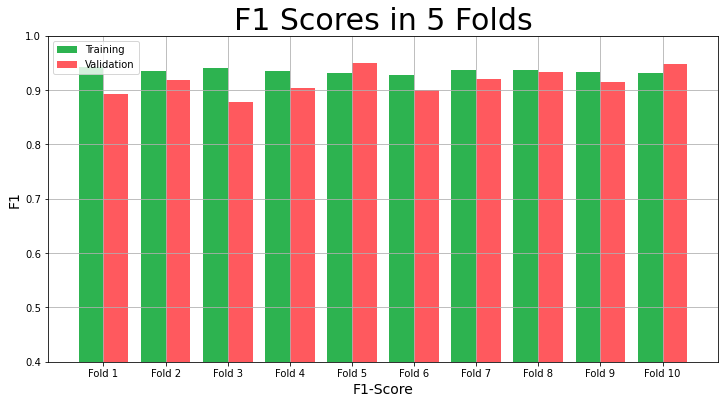

In [44]:
model_name = "Decision Tree"

plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

plot_result('Precision',
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

plot_result('Recall',
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

plot_result('F1-Score',
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])



# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [46]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42, min_samples_leaf=5)
decision_tree_result = cross_validation(rfc, df_upsampled, labels)
print(decision_tree_result)

{'Training Accuracy scores': array([0.93992248, 0.94573643, 0.95348837, 0.94379845, 0.94003868,
       0.94970986, 0.93423598, 0.94197292, 0.94003868, 0.93617021]), 'Mean Training Accuracy': 94.25112080728113, 'Training Precision scores': array([0.90974729, 0.91666667, 0.92086331, 0.90747331, 0.90106007,
       0.91134752, 0.9028777 , 0.9133574 , 0.91605839, 0.89788732]), 'Mean Training Precision': 0.9097338983116368, 'Training Recall scores': array([0.97674419, 0.98062016, 0.99224806, 0.98837209, 0.98837209,
       0.99612403, 0.97286822, 0.97683398, 0.96911197, 0.98455598]), 'Mean Training Recall': 0.9825850767711234, 'Training F1 scores': array([0.94205607, 0.94756554, 0.95522388, 0.94619666, 0.94269871,
       0.95185185, 0.93656716, 0.94402985, 0.94183865, 0.93922652]), 'Mean Training F1 Score': 0.9447254900286683, 'Validation Accuracy scores': array([0.9137931 , 0.89655172, 0.75862069, 0.9137931 , 0.92982456,
       0.98245614, 0.85964912, 0.94736842, 0.9122807 , 0.96491228]), 'M

In [47]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [48]:
print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ",
accuracy_score(y_test,y_pred)*100)
      
print("Report : ",
classification_report(y_test, y_pred))

Confusion Matrix:  [[ 97  10]
 [ 10 113]]
Accuracy :  91.30434782608695
Report :                precision    recall  f1-score   support

           0       0.91      0.91      0.91       107
           1       0.92      0.92      0.92       123

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



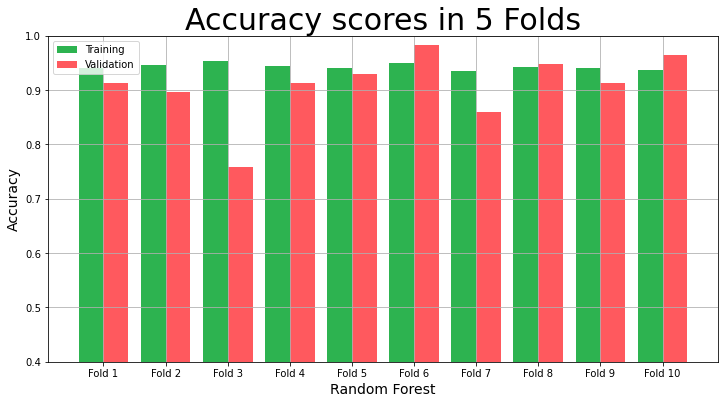

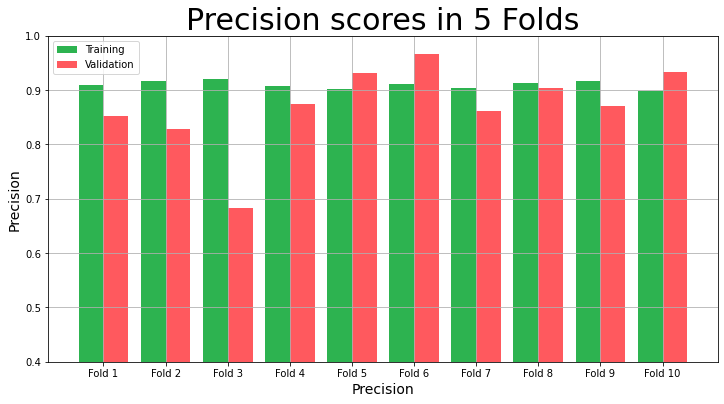

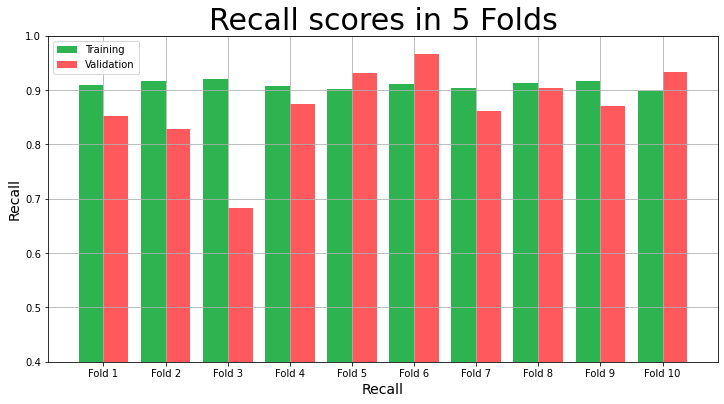

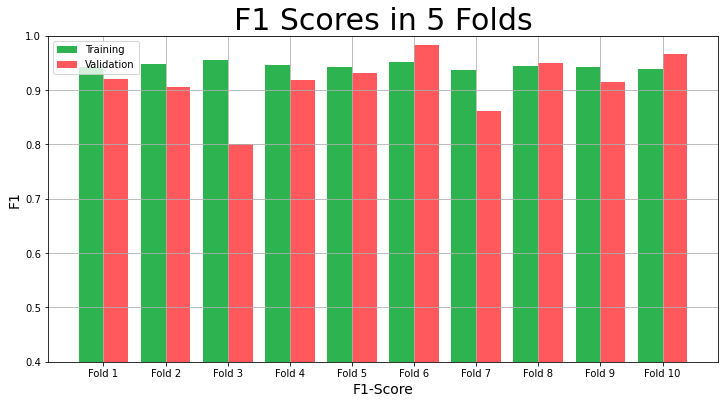

In [49]:
model_name = "Random Forest"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

plot_result('Precision',
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

plot_result('Recall',
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

plot_result('F1-Score',
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])